# Personal Project no. 1 - telecom customer churn

## Notebook 1 - Data cleaning and EDA

In this project, I will create predictive models to estimate whether a customer for a telecom company will turn over or churn. The data comes from an old Kaggle competition: https://www.kaggle.com/blastchar/telco-customer-churn/data#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Data import and cleaning

From Kaggle:  

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
#import data and show the head
df = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
#look for null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#examine the data for anomalies
for i in df.columns:
    print(df[i].value_counts())

5384-ZTTWP    1
5223-UZAVK    1
6851-WEFYX    1
5117-IFGPS    1
2585-KTFRE    1
5609-CEBID    1
0292-WEGCH    1
0440-MOGPM    1
8591-NXRCV    1
3638-DIMPH    1
2692-BUCFV    1
8086-OVPWV    1
5393-RXQSZ    1
1356-MKYSK    1
2558-BUOZZ    1
2307-FYNNL    1
4210-QFJMF    1
9372-TXXPS    1
2538-OIMXF    1
5387-ASZNZ    1
2082-CEFLT    1
3955-JBZZM    1
7526-BEZQB    1
7159-FVYPK    1
4869-EPIUS    1
6260-XLACS    1
2040-OBMLJ    1
2101-RANCD    1
1395-OFUWC    1
1334-FJSVR    1
             ..
9786-IJYDL    1
7375-WMVMT    1
1915-OAKWD    1
2761-OCIAX    1
4785-NKHCX    1
8905-IAZPF    1
0997-YTLNY    1
8958-JPTRR    1
3077-RSNTJ    1
2074-GUHPQ    1
9031-ZVQPT    1
2750-BJLSB    1
3712-PKXZA    1
6818-WOBHJ    1
9804-ICWBG    1
6110-OHIHY    1
4800-VHZKI    1
8197-BFWVU    1
5146-CBVOE    1
3758-CKOQL    1
2123-AGEEN    1
5862-BRIXZ    1
2688-BHGOG    1
1867-BDVFH    1
5970-GHJAW    1
7892-QVYKW    1
6921-OZMFH    1
1866-ZSLJM    1
2277-AXSDC    1
2927-QRRQV    1
Name: customerID, Length

In [6]:
print(len(df))
df = df[df['TotalCharges'] != ' ']
print(len(df))

7043
7032


In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace([1, 0], ['SeniorC', 'Not SeniorC'])
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [8]:
df._get_numeric_data().columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

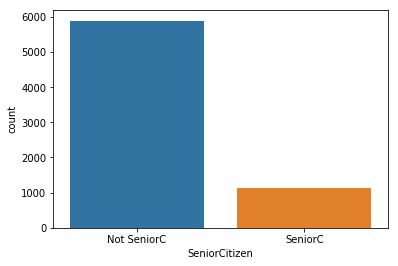

In [9]:
sns.countplot(x='SeniorCitizen', data=df)

In [10]:
for i in df.columns:
    if df[i].dtype == 'float64':
        df[i] = df[i].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null int64
TotalCharges        7032 non-null int64
Churn               7032 non-null object
dtypes: int64(3), object(18)
memory

In [11]:
data_corr = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
data_corr.dtypes

gender              object
SeniorCitizen       object
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges       int64
TotalCharges         int64
Churn               object
dtype: object

In [12]:
data_corr.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

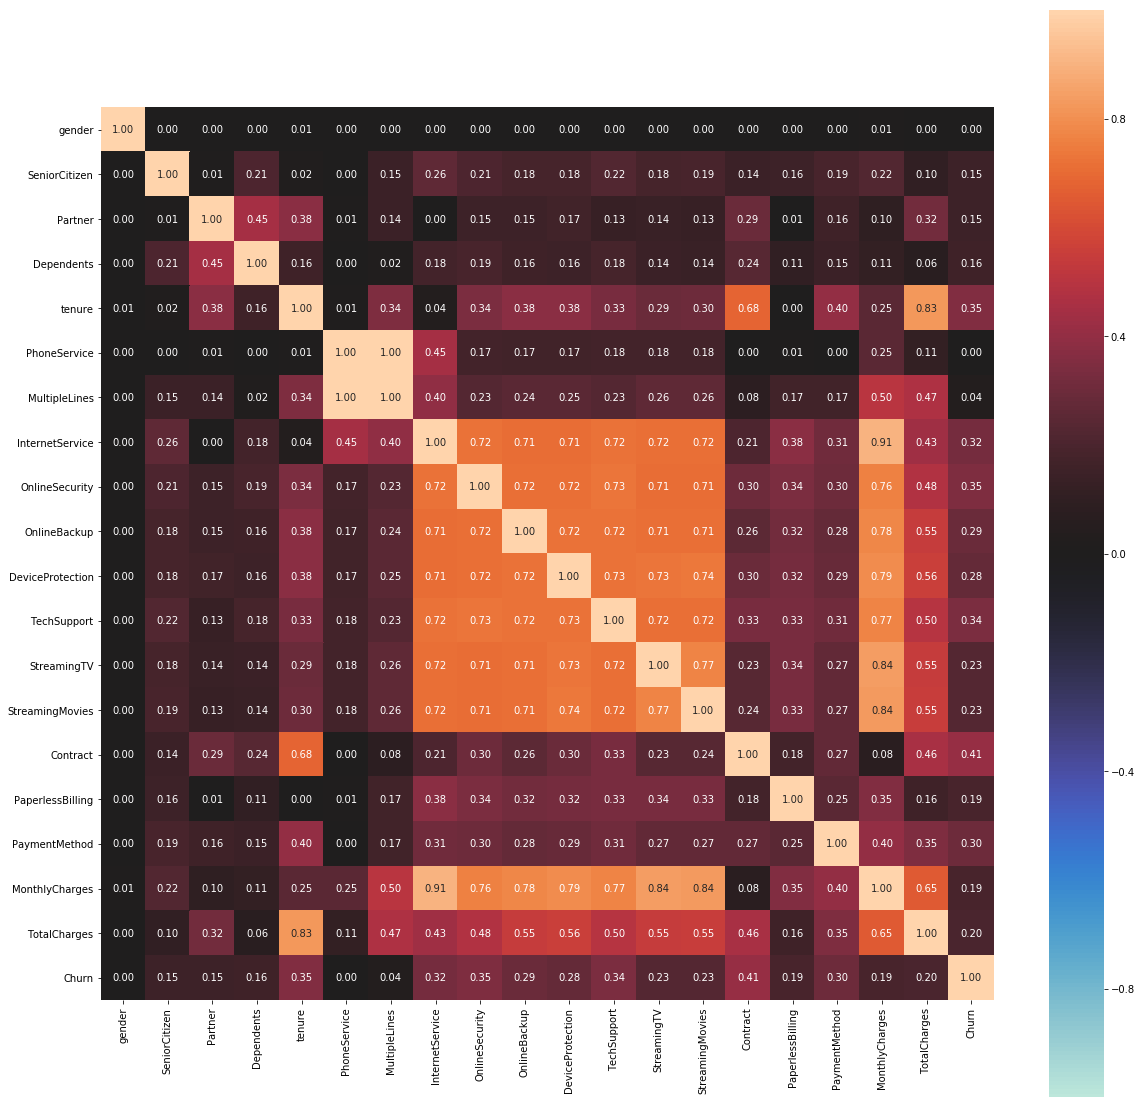

In [13]:
from dython.model_utils import roc_graph
from dython.nominal import associations

def associations_():
    associations(data_corr,nominal_columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                                            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'])
    
plt.rcParams["figure.figsize"]=20,20
associations_()

In [14]:
data_corr = data_corr.drop(['tenure', 'MonthlyCharges', 'MultipleLines'], axis=1)

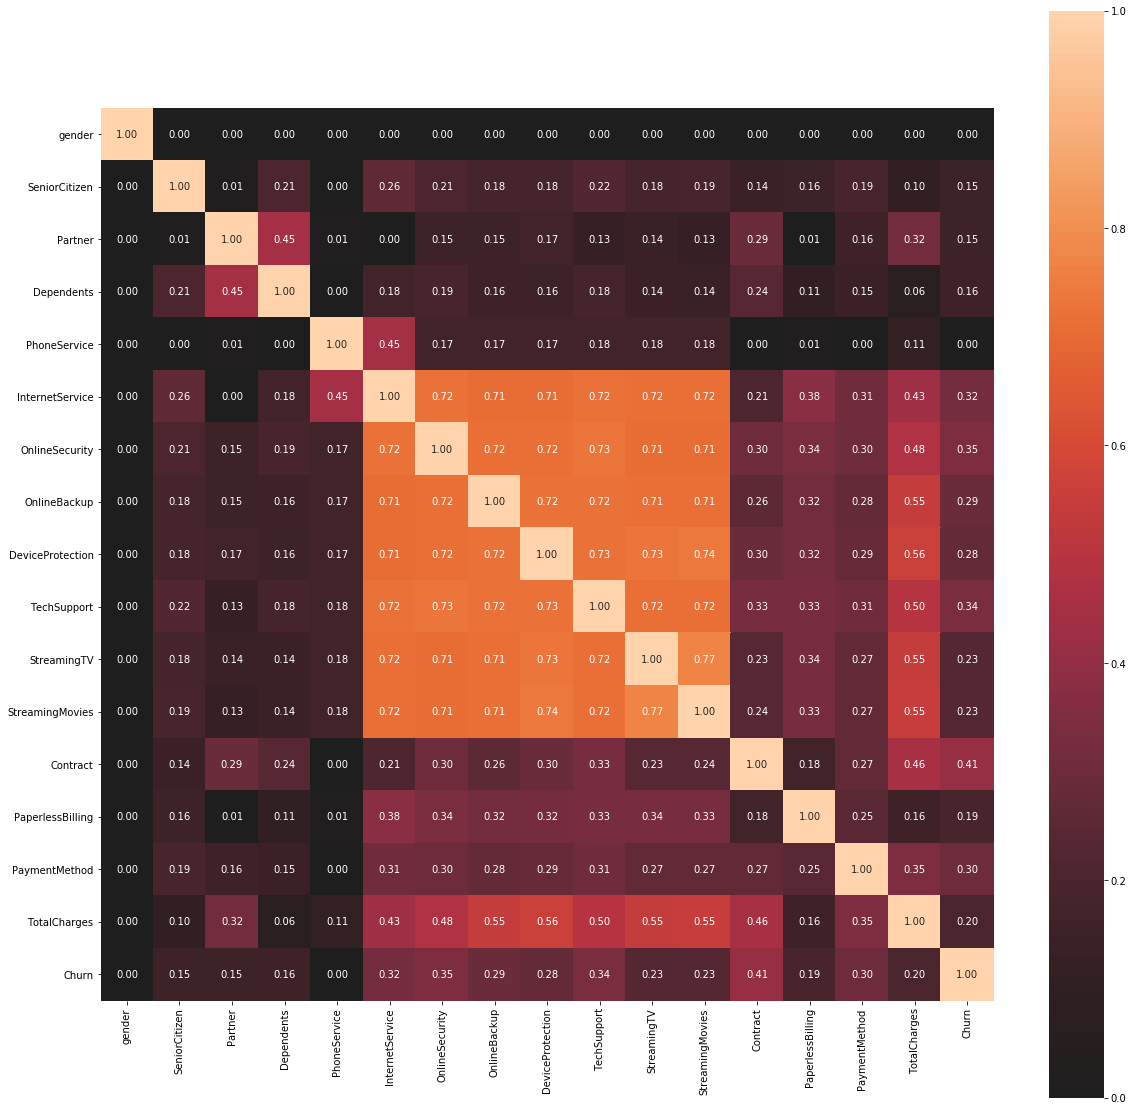

In [15]:
def associations_():
    associations(data_corr,nominal_columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                                            'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'])
    
plt.rcParams["figure.figsize"]=20,20
associations_()

In [16]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
PhoneService        7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
TotalCharges        7032 non-null int64
Churn               7032 non-null object
dtypes: int64(1), object(16)
memory usage: 1.3+ MB


In [17]:
from matplotlib import style
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

#Data points with their publisher name,category score, category name, place name
syms = data_corr['Churn']
X = data_corr.drop(['Churn'], axis=1)
#X[:, 0] = X[:, 0].astype(float)
kproto = KPrototypes(n_clusters=15, init='Cao', verbose=2)

cat_cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

clusters = kproto.fit_predict(X, categorical=cat_cols)

# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)

# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2165, ncost: 683307466.7104634
Run: 1, iteration: 2/100, moves: 1096, ncost: 519773633.4324107
Run: 1, iteration: 3/100, moves: 791, ncost: 428859809.6632817
Run: 1, iteration: 4/100, moves: 639, ncost: 363980414.8448067
Run: 1, iteration: 5/100, moves: 508, ncost: 333287351.0272976
Run: 1, iteration: 6/100, moves: 405, ncost: 318053219.17435086
Run: 1, iteration: 7/100, moves: 379, ncost: 305873533.09702265
Run: 1, iteration: 8/100, moves: 364, ncost: 295598984.23979187
Run: 1, iteration: 9/100, moves: 250, ncost: 287648049.20997894
Run: 1, iteration: 10/100, moves: 245, ncost: 278407347.403655

Run: 4, iteration: 14/100, moves: 124, ncost: 202465255.42585012
Run: 4, iteration: 15/100, moves: 118, ncost: 200106629.10479203
Run: 4, iteration: 16/100, moves: 68, ncost: 199375894.46943566
Run: 4, iteration: 17/100, moves: 70, ncost: 198753514.9002092
Run: 4, iteration: 18/100, moves: 53, ncost: 198313333.08499262
Run: 4, iteration: 19/100, moves: 62, ncost: 197932223.2617675
Run: 4, iteration: 20/100, moves: 33, ncost: 197787417.38749856
Run: 4, iteration: 21/100, moves: 17, ncost: 197739698.30386132
Run: 4, iteration: 22/100, moves: 13, ncost: 197712764.92571324
Run: 4, iteration: 23/100, moves: 5, ncost: 197700143.48876518
Run: 4, iteration: 24/100, moves: 3, ncost: 197696826.49712843
Run: 4, iteration: 25/100, moves: 0, ncost: 197696826.49712843
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: i

Run: 7, iteration: 26/100, moves: 9, ncost: 194552128.7542906
Run: 7, iteration: 27/100, moves: 4, ncost: 194551102.4797967
Run: 7, iteration: 28/100, moves: 5, ncost: 194549056.65484163
Run: 7, iteration: 29/100, moves: 2, ncost: 194548408.06356743
Run: 7, iteration: 30/100, moves: 1, ncost: 194548190.77489975
Run: 7, iteration: 31/100, moves: 4, ncost: 194546895.5533089
Run: 7, iteration: 32/100, moves: 5, ncost: 194545849.32863042
Run: 7, iteration: 33/100, moves: 0, ncost: 194545849.32863042
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initiali

Run: 10, iteration: 11/100, moves: 152, ncost: 227074161.6749911
Run: 10, iteration: 12/100, moves: 153, ncost: 225524938.1077345
Run: 10, iteration: 13/100, moves: 145, ncost: 224119349.47768
Run: 10, iteration: 14/100, moves: 127, ncost: 223236369.33198202
Run: 10, iteration: 15/100, moves: 80, ncost: 223004918.73913985
Run: 10, iteration: 16/100, moves: 51, ncost: 222916872.1997841
Run: 10, iteration: 17/100, moves: 37, ncost: 222856348.88645732
Run: 10, iteration: 18/100, moves: 49, ncost: 222796129.00082076
Run: 10, iteration: 19/100, moves: 43, ncost: 222737361.82634327
Run: 10, iteration: 20/100, moves: 46, ncost: 222655830.8692085
Run: 10, iteration: 21/100, moves: 38, ncost: 222612557.66206983
Run: 10, iteration: 22/100, moves: 46, ncost: 222563144.21381673
Run: 10, iteration: 23/100, moves: 40, ncost: 222522532.05154058
Run: 10, iteration: 24/100, moves: 31, ncost: 222500431.84428725
Run: 10, iteration: 25/100, moves: 13, ncost: 222485254.05780214
Run: 10, iteration: 26/100, 

In [18]:
#Print count of each cluster
print(pd.Series(clusters).value_counts())

for s, c in zip(syms, clusters):
    print("Result: {}, cluster:{}".format(s, c))
# Plot the results
for i in set(kproto.labels_):
    index = kproto.labels_ == i
    plt.plot(X[index, 0], X[index, 1], 'o')
    plt.suptitle('Data points categorized with category score', fontsize=18)
    plt.xlabel('Category Score', fontsize=16)
    plt.ylabel('Category Type', fontsize=16)
plt.show()
# Clustered result
fig1, ax3 = plt.subplots()
scatter = ax3.scatter(syms, clusters, c=clusters, s=50)
ax3.set_xlabel('Data points')
ax3.set_ylabel('Cluster')
plt.colorbar(scatter)
ax3.set_title('Data points classifed according to known centers')
plt.show()
result = zip(syms, kproto.labels_)
sortedR = sorted(result, key=lambda x: x[1])
print(sortedR)

0     1506
9      872
8      719
6      665
14     506
12     400
5      339
2      308
13     303
10     283
1      281
4      254
7      239
11     200
3      157
dtype: int64
Result: No, cluster:0
Result: No, cluster:14
Result: Yes, cluster:0
Result: No, cluster:14
Result: Yes, cluster:0
Result: Yes, cluster:8
Result: No, cluster:14
Result: No, cluster:0
Result: Yes, cluster:5
Result: No, cluster:1
Result: No, cluster:9
Result: No, cluster:9
Result: No, cluster:10
Result: Yes, cluster:7
Result: No, cluster:12
Result: No, cluster:3
Result: No, cluster:8
Result: No, cluster:11
Result: Yes, cluster:9
Result: No, cluster:14
Result: Yes, cluster:0
Result: No, cluster:0
Result: Yes, cluster:0
Result: No, cluster:1
Result: No, cluster:5
Result: No, cluster:6
Result: Yes, cluster:13
Result: Yes, cluster:0
Result: No, cluster:4
Result: Yes, cluster:8
Result: No, cluster:4
Result: No, cluster:0
Result: No, cluster:14
Result: No, cluster:0
Result: No, cluster:0
Result: No, cluster:11
Result: Y

Result: No, cluster:14
Result: No, cluster:3
Result: No, cluster:6
Result: No, cluster:6
Result: No, cluster:8
Result: No, cluster:0
Result: No, cluster:6
Result: No, cluster:0
Result: No, cluster:8
Result: No, cluster:8
Result: Yes, cluster:0
Result: No, cluster:12
Result: No, cluster:8
Result: No, cluster:0
Result: Yes, cluster:0
Result: Yes, cluster:6
Result: No, cluster:14
Result: No, cluster:0
Result: No, cluster:9
Result: No, cluster:1
Result: No, cluster:6
Result: No, cluster:7
Result: No, cluster:8
Result: No, cluster:10
Result: No, cluster:7
Result: Yes, cluster:0
Result: No, cluster:12
Result: Yes, cluster:0
Result: No, cluster:13
Result: Yes, cluster:8
Result: No, cluster:10
Result: No, cluster:9
Result: No, cluster:0
Result: No, cluster:6
Result: No, cluster:0
Result: No, cluster:5
Result: No, cluster:3
Result: Yes, cluster:10
Result: No, cluster:5
Result: Yes, cluster:0
Result: No, cluster:8
Result: No, cluster:8
Result: Yes, cluster:9
Result: No, cluster:1
Result: Yes, cl

Result: Yes, cluster:0
Result: Yes, cluster:5
Result: Yes, cluster:6
Result: Yes, cluster:0
Result: No, cluster:14
Result: No, cluster:14
Result: No, cluster:6
Result: No, cluster:8
Result: No, cluster:10
Result: No, cluster:0
Result: No, cluster:9
Result: Yes, cluster:0
Result: Yes, cluster:0
Result: No, cluster:8
Result: No, cluster:0
Result: No, cluster:5
Result: No, cluster:4
Result: Yes, cluster:1
Result: No, cluster:6
Result: No, cluster:8
Result: Yes, cluster:9
Result: Yes, cluster:0
Result: No, cluster:5
Result: No, cluster:5
Result: No, cluster:12
Result: No, cluster:8
Result: No, cluster:0
Result: No, cluster:8
Result: No, cluster:14
Result: No, cluster:2
Result: No, cluster:12
Result: No, cluster:3
Result: Yes, cluster:0
Result: No, cluster:13
Result: No, cluster:14
Result: No, cluster:8
Result: No, cluster:6
Result: No, cluster:0
Result: No, cluster:8
Result: No, cluster:12
Result: Yes, cluster:0
Result: No, cluster:7
Result: No, cluster:0
Result: Yes, cluster:14
Result: No

Result: Yes, cluster:0
Result: No, cluster:6
Result: No, cluster:3
Result: No, cluster:6
Result: Yes, cluster:7
Result: Yes, cluster:6
Result: No, cluster:12
Result: No, cluster:0
Result: Yes, cluster:2
Result: Yes, cluster:5
Result: Yes, cluster:9
Result: No, cluster:0
Result: No, cluster:13
Result: No, cluster:0
Result: No, cluster:14
Result: No, cluster:6
Result: No, cluster:6
Result: Yes, cluster:12
Result: No, cluster:0
Result: No, cluster:7
Result: Yes, cluster:0
Result: Yes, cluster:9
Result: No, cluster:12
Result: No, cluster:14
Result: No, cluster:0
Result: No, cluster:7
Result: No, cluster:9
Result: No, cluster:5
Result: Yes, cluster:0
Result: No, cluster:4
Result: No, cluster:10
Result: No, cluster:5
Result: No, cluster:7
Result: No, cluster:3
Result: Yes, cluster:0
Result: Yes, cluster:14
Result: No, cluster:13
Result: No, cluster:4
Result: No, cluster:9
Result: Yes, cluster:12
Result: No, cluster:0
Result: No, cluster:8
Result: No, cluster:9
Result: Yes, cluster:0
Result: 

Result: No, cluster:14
Result: No, cluster:0
Result: Yes, cluster:0
Result: Yes, cluster:0
Result: No, cluster:10
Result: Yes, cluster:5
Result: No, cluster:1
Result: No, cluster:5
Result: No, cluster:8
Result: No, cluster:8
Result: No, cluster:0
Result: No, cluster:5
Result: No, cluster:9
Result: No, cluster:13
Result: No, cluster:14
Result: No, cluster:14
Result: No, cluster:6
Result: Yes, cluster:0
Result: No, cluster:12
Result: No, cluster:12
Result: No, cluster:9
Result: No, cluster:12
Result: No, cluster:8
Result: No, cluster:9
Result: No, cluster:11
Result: No, cluster:0
Result: No, cluster:13
Result: Yes, cluster:9
Result: No, cluster:8
Result: No, cluster:0
Result: No, cluster:11
Result: Yes, cluster:2
Result: No, cluster:12
Result: No, cluster:6
Result: No, cluster:13
Result: No, cluster:8
Result: Yes, cluster:0
Result: Yes, cluster:1
Result: Yes, cluster:2
Result: Yes, cluster:0
Result: No, cluster:0
Result: No, cluster:14
Result: No, cluster:0
Result: No, cluster:6
Result: 

Result: No, cluster:8
Result: No, cluster:7
Result: Yes, cluster:0
Result: No, cluster:12
Result: Yes, cluster:0
Result: No, cluster:0
Result: Yes, cluster:13
Result: No, cluster:0
Result: No, cluster:9
Result: Yes, cluster:1
Result: No, cluster:0
Result: No, cluster:0
Result: No, cluster:0
Result: No, cluster:3
Result: No, cluster:8
Result: Yes, cluster:6
Result: No, cluster:9
Result: Yes, cluster:6
Result: No, cluster:8
Result: No, cluster:12
Result: No, cluster:14
Result: No, cluster:8
Result: No, cluster:9
Result: No, cluster:4
Result: Yes, cluster:0
Result: No, cluster:4
Result: No, cluster:9
Result: Yes, cluster:9
Result: Yes, cluster:0
Result: No, cluster:12
Result: No, cluster:9
Result: No, cluster:9
Result: No, cluster:0
Result: No, cluster:8
Result: No, cluster:14
Result: Yes, cluster:12
Result: No, cluster:9
Result: Yes, cluster:12
Result: No, cluster:6
Result: Yes, cluster:2
Result: No, cluster:9
Result: Yes, cluster:8
Result: Yes, cluster:0
Result: No, cluster:10
Result: N

Result: No, cluster:10
Result: Yes, cluster:0
Result: No, cluster:0
Result: Yes, cluster:0
Result: No, cluster:8
Result: No, cluster:9
Result: Yes, cluster:0
Result: Yes, cluster:0
Result: No, cluster:2
Result: Yes, cluster:0
Result: No, cluster:5
Result: No, cluster:8
Result: No, cluster:9
Result: No, cluster:12
Result: Yes, cluster:1
Result: No, cluster:0
Result: Yes, cluster:9
Result: No, cluster:11
Result: No, cluster:14
Result: No, cluster:0
Result: No, cluster:14
Result: No, cluster:12
Result: No, cluster:13
Result: No, cluster:1
Result: No, cluster:0
Result: Yes, cluster:0
Result: No, cluster:1
Result: Yes, cluster:8
Result: No, cluster:8
Result: No, cluster:14
Result: No, cluster:0
Result: No, cluster:2
Result: No, cluster:2
Result: Yes, cluster:9
Result: No, cluster:6
Result: No, cluster:1
Result: No, cluster:0
Result: No, cluster:5
Result: No, cluster:0
Result: No, cluster:0
Result: No, cluster:5
Result: Yes, cluster:0
Result: Yes, cluster:9
Result: Yes, cluster:0
Result: No,

Result: No, cluster:9
Result: No, cluster:1
Result: No, cluster:8
Result: No, cluster:7
Result: No, cluster:6
Result: Yes, cluster:8
Result: No, cluster:14
Result: No, cluster:0
Result: No, cluster:10
Result: No, cluster:0
Result: No, cluster:8
Result: No, cluster:7
Result: No, cluster:9
Result: No, cluster:0
Result: No, cluster:0
Result: No, cluster:14
Result: No, cluster:9
Result: No, cluster:8
Result: Yes, cluster:9
Result: No, cluster:14
Result: No, cluster:6
Result: No, cluster:8
Result: Yes, cluster:12
Result: No, cluster:4
Result: Yes, cluster:0
Result: No, cluster:1
Result: No, cluster:14
Result: No, cluster:0
Result: No, cluster:2
Result: No, cluster:6
Result: No, cluster:12
Result: Yes, cluster:8
Result: No, cluster:2
Result: No, cluster:1
Result: No, cluster:10
Result: No, cluster:9
Result: No, cluster:0
Result: No, cluster:0
Result: No, cluster:12
Result: No, cluster:2
Result: No, cluster:9
Result: No, cluster:9
Result: No, cluster:12
Result: Yes, cluster:13
Result: Yes, cl

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
scores = [kproto.fit_predict(X, categorical=cat_cols).inertia_ for i in range(8)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1013, ncost: 364432840.2326446
Run: 1, iteration: 2/100, moves: 596, ncost: 325872557.09455574
Run: 1, iteration: 3/100, moves: 370, ncost: 305639021.6147806
Run: 1, iteration: 4/100, moves: 294, ncost: 290019082.2496199
Run: 1, iteration: 5/100, moves: 270, ncost: 274371862.83984894
Run: 1, iteration: 6/100, moves: 258, ncost: 256841048.73093915
Run: 1, iteration: 7/100, moves: 219, ncost: 244059557.81083626
Run: 1, iteration: 8/100, moves: 193, ncost: 234938310.90270802
Run: 1, iteration: 9/100, moves: 169, ncost: 228989215.9860315
Run: 1, iteration: 10/100, moves: 175, ncost: 223413093.9385456
Run: 1, iteration: 11/100, moves: 148, ncost: 220992662.11804926
Run: 1, iteration: 12/100, moves: 155, ncost: 218958637.26094988
Run: 1, iteration: 13/100, moves: 121, ncost: 217706437.50918663
Run: 1, iteration: 14/100, move

In [ ]:
# !pip uninstall umap
# !pip install umap-learn

In [ ]:
# from sklearn.preprocessing import PowerTransformer
# #import umap
# from umap import umap_ as umap

# numerical = data_corr.select_dtypes(exclude='object')

# for c in numerical.columns:
#     pt = PowerTransformer()
#     numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
# ##preprocessing categorical
# categorical = data_corr.select_dtypes(include='object')
# categorical = pd.get_dummies(categorical)

# #Percentage of columns which are categorical is used as weight parameter in embeddings later
# categorical_weight = len(data_corr.select_dtypes(include='object').columns) / data_corr.shape[1]

# #Embedding numerical & categorical
# fit1 = umap.umap(metric='l2').fit(numerical)
# fit2 = umap.umap(metric='dice').fit(categorical)

# #Augmenting the numerical embedding with categorical
# intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
# intersection = umap.umap_.reset_local_connectivity(intersection)
# embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
#                                                 fit1._initial_alpha, fit1._a, fit1._b, 
#                                                 fit1.repulsion_strength, fit1.negative_sample_rate, 
#                                                 200, 'random', np.random, fit1.metric, 
#                                                 fit1._metric_kwds, False)

# plt.figure(figsize=(20, 10))
# plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
# plt.show()

In [ ]:
# fig, ax = plt.subplots()
# fig.set_size_inches((20, 10))
# scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0)

# # produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(num=15),
#                     loc="lower left", title="Classes")
# ax.add_artist(legend1)